# Laboratory session 04

 Capettini Hilario (Matricola N. 2013031)

## Six Boxes Toy Model : inference


- The six boxes toy model is described in reference [1].

- Labeling the boxes as follows:

<img src="Images\boxes.png">

- write a program in R that:


### allows the user to insert the color of a randomly extracted box and


In [1]:
library("tibble")
library("tidyverse")
library("magrittr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
SBTM <- function(color,prior){
        #Initialize lk
        lk <- vector(mode ="double",length=6)
    
        #Estimate likelihood
        for (j in c(0:5)){
            if (color =='w')     {lk[j+1] <- j/5}
            else if (color =='b'){lk[j+1] <- (5-j)/5}
        }
        
        #Estimate the evidence
        ev <- lk%*%prior
    
        posterior <- lk*prior/as.vector(ev)
        return(posterior)
}

In [3]:
a <- rep(0.167,6)
a
SBTM('w',a)

[1] 0.167 0.167 0.167 0.167 0.167 0.167

[1] 0.00000000 0.06666667 0.13333333 0.20000000 0.26666667 0.33333333

### prints on the standard output the probability of selecting each box


In [10]:
#We initialize the prior
initial_prior <- rep(0.167,6)

#Initialize a matrix to keep the results
results <- tibble(
  k  = numeric(),
  H0 = numeric(),
  H1 = numeric(),
  H2 = numeric(),
  H3 = numeric(),
  H4 = numeric(),
  H5 = numeric()  
)

a <- initial_prior

for (i in c(1:100)){
    #this read your measurement
    measure <- readline(prompt="Enter a color (w or b): ")
    if (measure !='w' && measure !='b') {break}
    
    a <- SBTM(measure,a)
    results %<>% add_row(k = i, H0 = a[1], H1 = a[2], H2 = a[3],H3 = a[4],H4 = a[5],H5 = a[6])
    Sys.sleep(0.1)
    print.data.frame(results)
    cat('')
    flush.console()
    #print(results)
}

Enter a color (w or b): w
  k H0         H1        H2  H3        H4        H5
1 1  0 0.06666667 0.1333333 0.2 0.2666667 0.3333333
Enter a color (w or b): b
  k H0         H1        H2  H3        H4        H5
1 1  0 0.06666667 0.1333333 0.2 0.2666667 0.3333333
2 2  0 0.20000000 0.3000000 0.3 0.2000000 0.0000000
Enter a color (w or b): b
  k H0         H1        H2   H3        H4        H5
1 1  0 0.06666667 0.1333333 0.20 0.2666667 0.3333333
2 2  0 0.20000000 0.3000000 0.30 0.2000000 0.0000000
3 3  0 0.32000000 0.3600000 0.24 0.0800000 0.0000000
Enter a color (w or b): b
  k H0         H1        H2        H3         H4        H5
1 1  0 0.06666667 0.1333333 0.2000000 0.26666667 0.3333333
2 2  0 0.20000000 0.3000000 0.3000000 0.20000000 0.0000000
3 3  0 0.32000000 0.3600000 0.2400000 0.08000000 0.0000000
4 4  0 0.43835616 0.3698630 0.1643836 0.02739726 0.0000000
Enter a color (w or b): w
  k H0         H1        H2        H3         H4        H5
1 1  0 0.06666667 0.1333333 0.2000000 0.2666

In [11]:
results

k,H0,H1,H2,H3,H4,H5
1,0,0.06666667,0.1333333,0.20000000,0.266666667,0.3333333
2,0,0.20000000,0.3000000,0.30000000,0.200000000,0.0000000
3,0,0.32000000,0.3600000,0.24000000,0.080000000,0.0000000
4,0,0.43835616,0.3698630,0.16438356,0.027397260,0.0000000
5,0,0.24615385,0.4153846,0.27692308,0.061538462,0.0000000
6,0,0.11428571,0.3857143,0.38571429,0.114285714,0.0000000
7,0,0.18285714,0.4628571,0.30857143,0.045714286,0.0000000
8,0,0.26283368,0.4989733,0.22176591,0.016427105,0.0000000
9,0,0.34948805,0.4976109,0.14744027,0.005460751,0.0000000
10,0,0.43807487,0.4678075,0.09240642,0.001711230,0.0000000


### plots the probability for each box as a function of the extraction step


In [12]:
library(showtext)
showtext_auto()
library("scales")

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

Loading required package: sysfonts
Loading required package: showtextdb

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



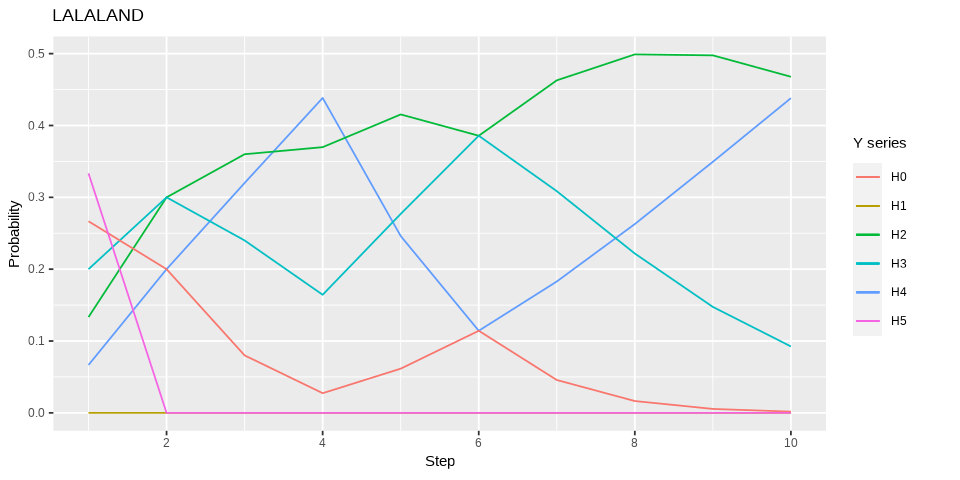

In [51]:
set_plot_dimensions(8, 4)

ggplot() + 
  geom_line(data=results, aes(x=k,y = H0,color = "darkblue")) + 
  geom_line(data=results, aes(x=k,y = H1,color = "red")) + 
  geom_line(data=results, aes(x=k,y = H2,color = "darkorange")) +
  geom_line(data=results, aes(x=k,y = H3,color = "green")) +
  geom_line(data=results, aes(x=k,y = H4,color = "black")) +
  geom_line(data=results, aes(x=k,y = H5,color = "yellow")) +
       
  labs(title ="LALALAND")+
  ylab("Probability") + xlab("Step")+
  scale_color_discrete(name = "Y series", labels = c("H0", "H1", "H2", "H3", "H4", "H5"))+
  scale_x_continuous(breaks = pretty_breaks())

## Six Boxes Toy Model : simulation


- consider again the six boxes toy model of the previous exercise and write a simulation program that:


### selects a random box


### makes random sampling from the box


### prints on the standard output the probability of selecting each box


### plots the probability for each box as a function of the number of trial


## Exercise

- An important property of the gamma distribution is the so-called reproductive property

- given a sequence of independent random variable $X_j ∼ Gamma(\alpha_j , \beta)$, it follows that

$$ Y = \sum_{j=1}^{n} X_j = Y ~ \; \text{Gamma}(\alpha,\beta) \; \text{where} \; \sum_{j=1}^n \alpha_j$$


-  if $\alpha = m$ is an integer, a random variable from gamma distribution $Gamma(m, \beta)$ (also known as Erlang distribution) can be obtained by summing m independent exponential random variables $X_j ∼ Exp(\beta)$:

$$ Ecuacion$$


- a) write an algorithm to sample variables from an Erlang distribution Gamma$(m, \beta)$


## Exercise

-  one of the first random number generator was proposed by von Neumann, the so-called middle square algorithm


-  write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number


-  Suggestion : after having squared the number, convert it to a list of characters (number <- unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse="")))


In [ ]:
p <- function(algo){return(cat(algo))}

In [ ]:
for (i in c(1:1000000)){p(i)}